# ***Used Phone Price prediction***

# **About Dataset**
# **CONTEXT**
The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both
consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand
trade also reduces their environmental impact and helps in recycling and reducing waste. Here is a sample dataset of normalized used and
new pricing data of refurbished / used devices.

Our data has 3454 values and 15 columns, Here we will use the "used_device_data.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.
# **OBJECTIVE**
The objective is to do Exploratory Data Analytics and apply Linear Regression to create a model which can help in pricing of such devices.
# **Variables**
device_brand: Name of manufacturing brand

os: OS on which the device runs

screen_size: Size of the screen in cm

4g: Whether 4G is available or not

5g: Whether 5G is available or not

front_camera_mp: Resolution of the rear camera in megapixels

back_camera_mp: Resolution of the front camera in megapixels

internal_memory: Amount of internal memory (ROM) in GB

ram: Amount of RAM in GB

battery: Energy capacity of the device battery in mAh

weight: Weight of the device in grams

release_year: Year when the device model was released

days_used: Number of days the used/refurbished device has been used

normalized_new_price: Normalized price of a new device of the same model

normalized_used_price (TARGET): Normalized price of the used/refurbished device

# **Importing Libraries**


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk

# **Getting Data**

In [141]:
df=pd.read_csv('/content/drive/MyDrive/dataset/used_device_data.csv')
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


Here we can see that we have categorical and continuous variables, we can also see that we have this column ID that will probably not be used, we can also see that we have some null values.

# **Initial Review**

In [142]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [144]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [145]:
df.dtypes

device_brand              object
os                        object
screen_size              float64
4g                        object
5g                        object
rear_camera_mp           float64
front_camera_mp          float64
internal_memory          float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object

# **Checking Missing Values**


In [146]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

As our null data is a very small part of our database, here we are going to fill these values ​​with the mean of the variable.

In [147]:
df['rear_camera_mp']=df['rear_camera_mp'].fillna(df['rear_camera_mp'].mean())
df['front_camera_mp']=df['front_camera_mp'].fillna(df['front_camera_mp'].mean())
df['internal_memory']=df['internal_memory'].fillna(df['internal_memory'].mean())
df['ram']=df['ram'].fillna(df['ram'].mean())
df['battery']=df['battery'].fillna(df['battery'].mean())
df['weight']=df['weight'].fillna(df['weight'].mean())

In [148]:
(df.isnull().sum()/len(df))

device_brand             0.0
os                       0.0
screen_size              0.0
4g                       0.0
5g                       0.0
rear_camera_mp           0.0
front_camera_mp          0.0
internal_memory          0.0
ram                      0.0
battery                  0.0
weight                   0.0
release_year             0.0
days_used                0.0
normalized_used_price    0.0
normalized_new_price     0.0
dtype: float64

# **Checking duplicate values**

In [149]:
df.duplicated().sum()

0

# **No duplicate values found!**


<Axes: >

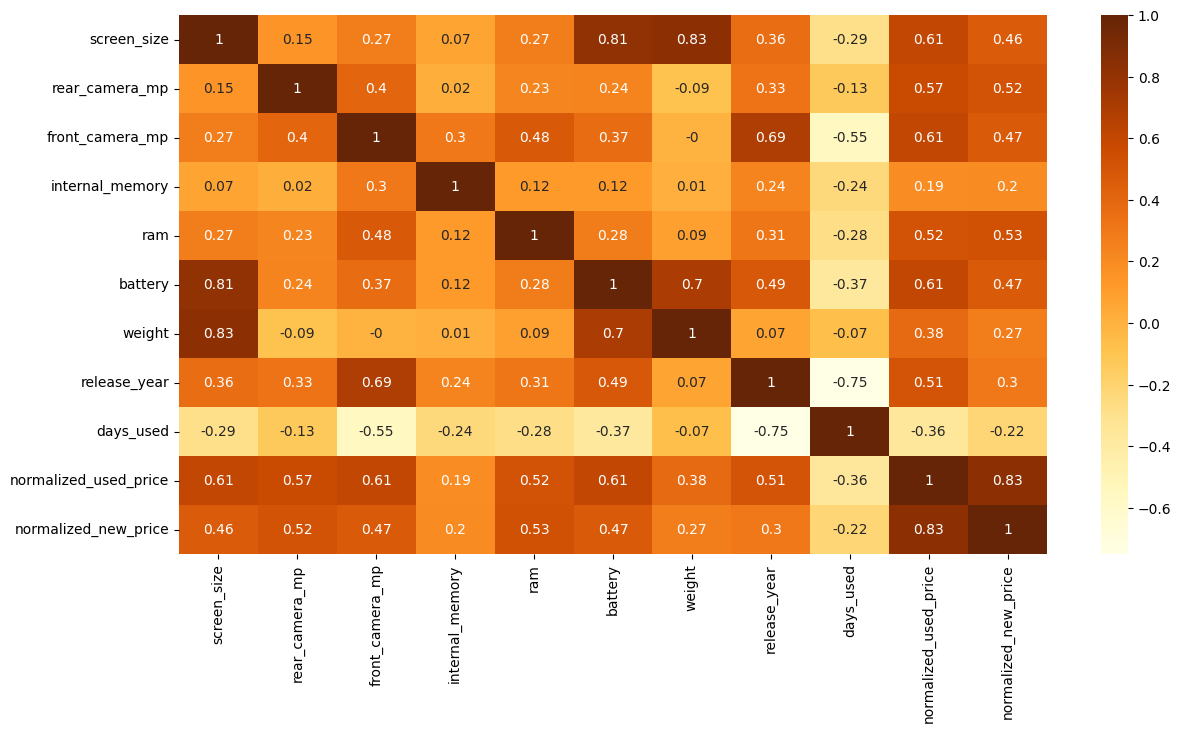

In [150]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# **Exploring Categorical features**

In [151]:
len(df.device_brand.value_counts())

34

In [152]:
df.device_brand.unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

<Axes: xlabel='count', ylabel='device_brand'>

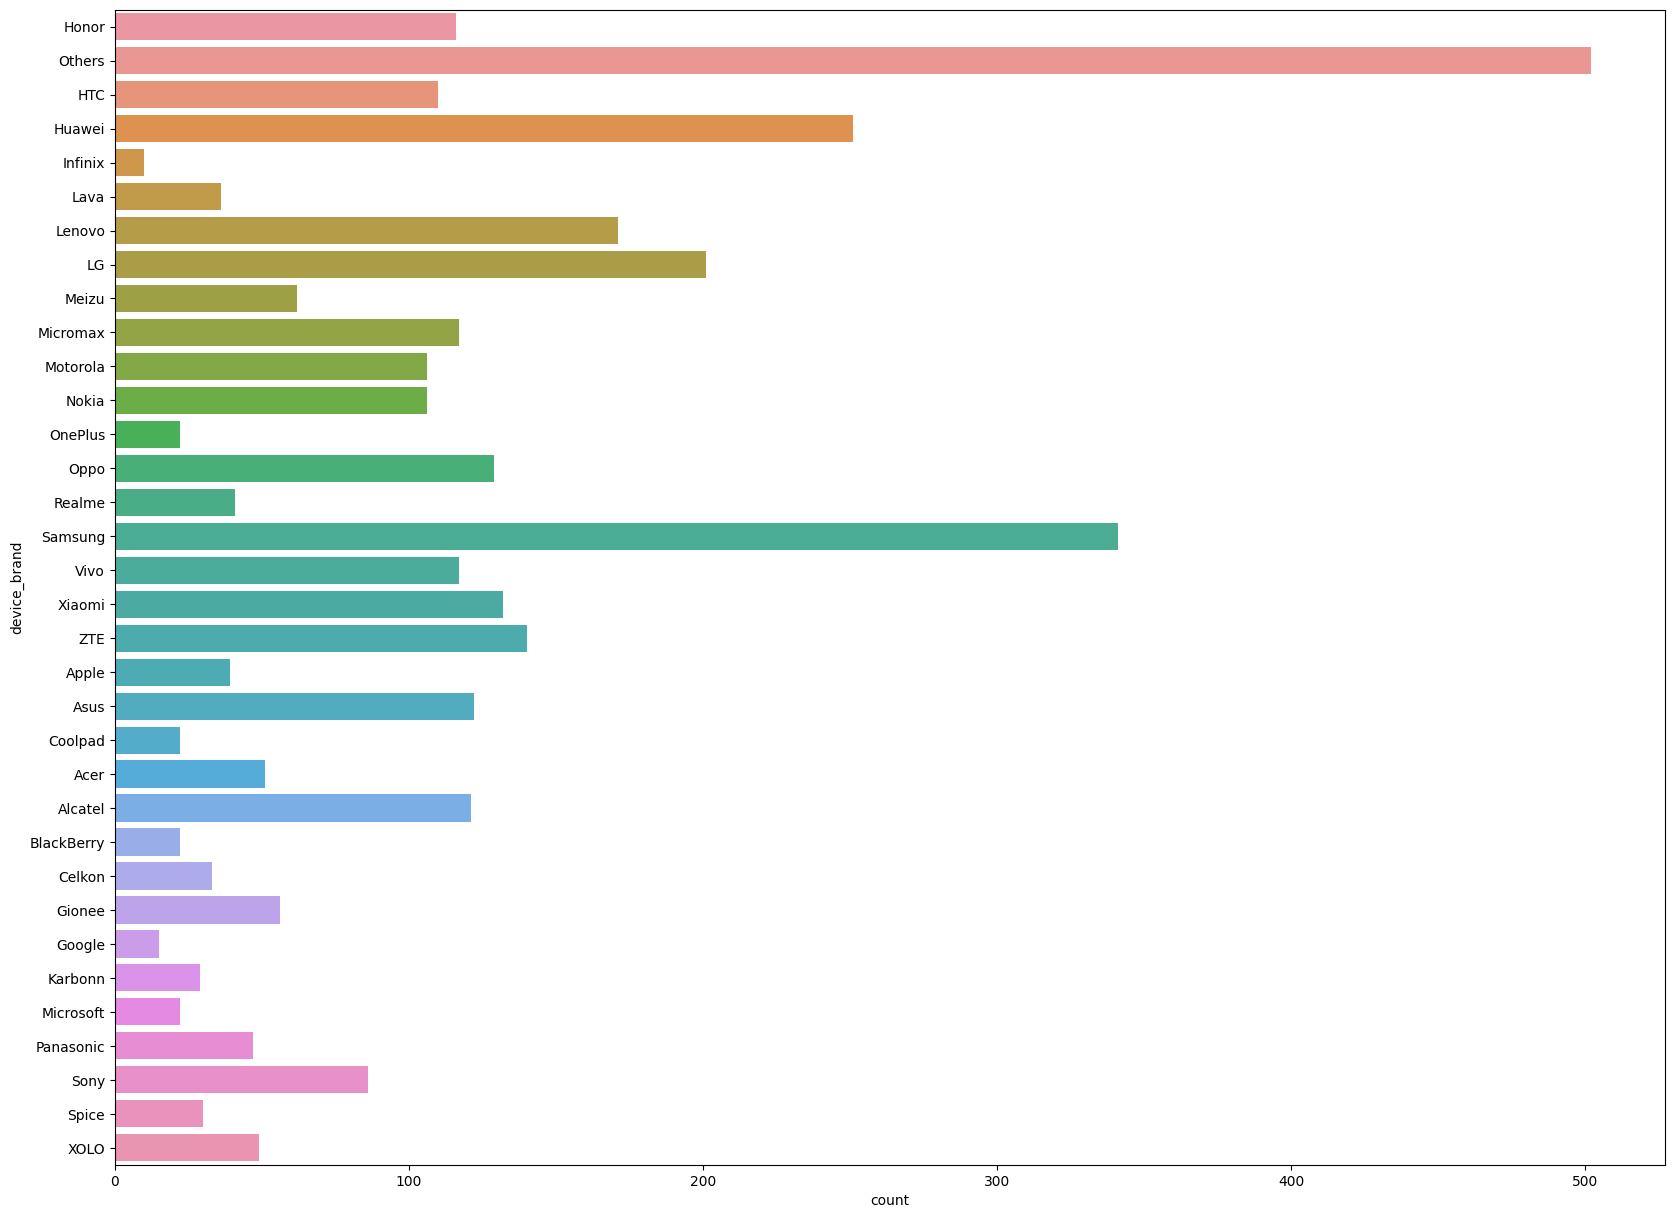

In [153]:
plt.figure(figsize = (20,15))
sns.countplot(y = 'device_brand', data = df)

In [154]:
df.os.value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

<Axes: xlabel='os', ylabel='count'>

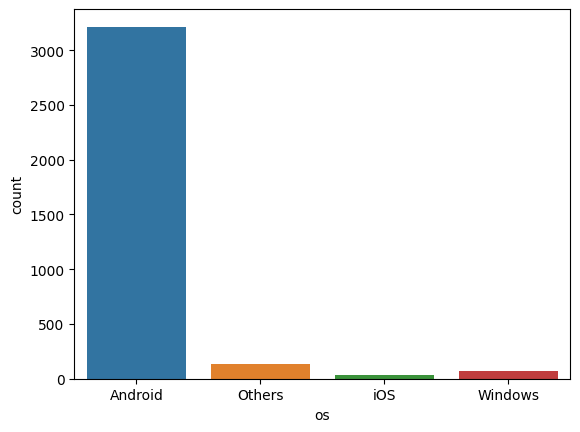

In [155]:
sns.countplot(x = 'os', data = df)

# **Android phones are highest in number**

In [156]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

<Axes: xlabel='5g', ylabel='count'>

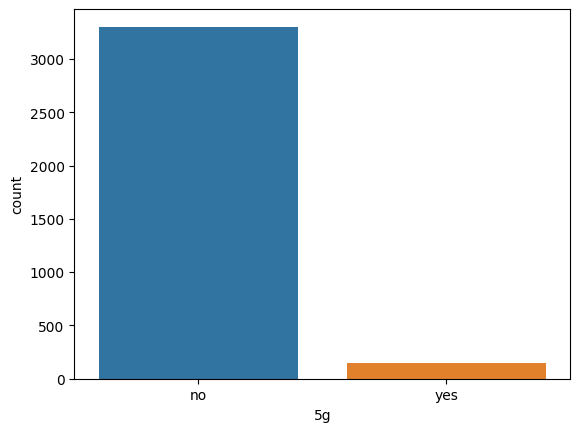

In [157]:
sns.countplot(x = '5g', data = df)

# **There are very few phones with 5G**

In [158]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

<Axes: xlabel='4g', ylabel='count'>

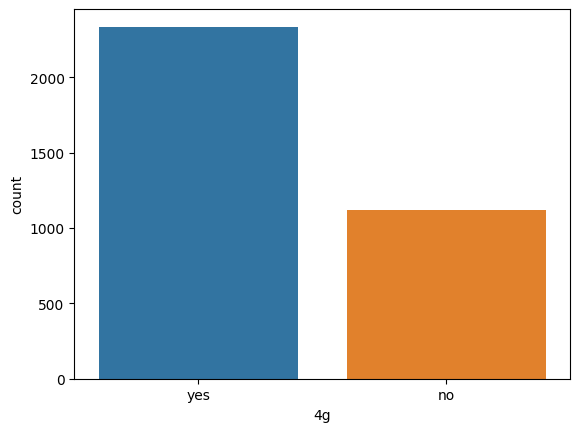

In [159]:
sns.countplot(x = '4g', data = df)

# **There are more phones 4G enabled**

In [160]:
df['ram'].value_counts()

4.000000     2815
6.000000      154
8.000000      130
2.000000       90
0.250000       83
3.000000       81
1.000000       34
12.000000      18
0.020000       18
0.030000       17
0.500000        9
4.036122        4
1.500000        1
Name: ram, dtype: int64

<Axes: xlabel='ram', ylabel='count'>

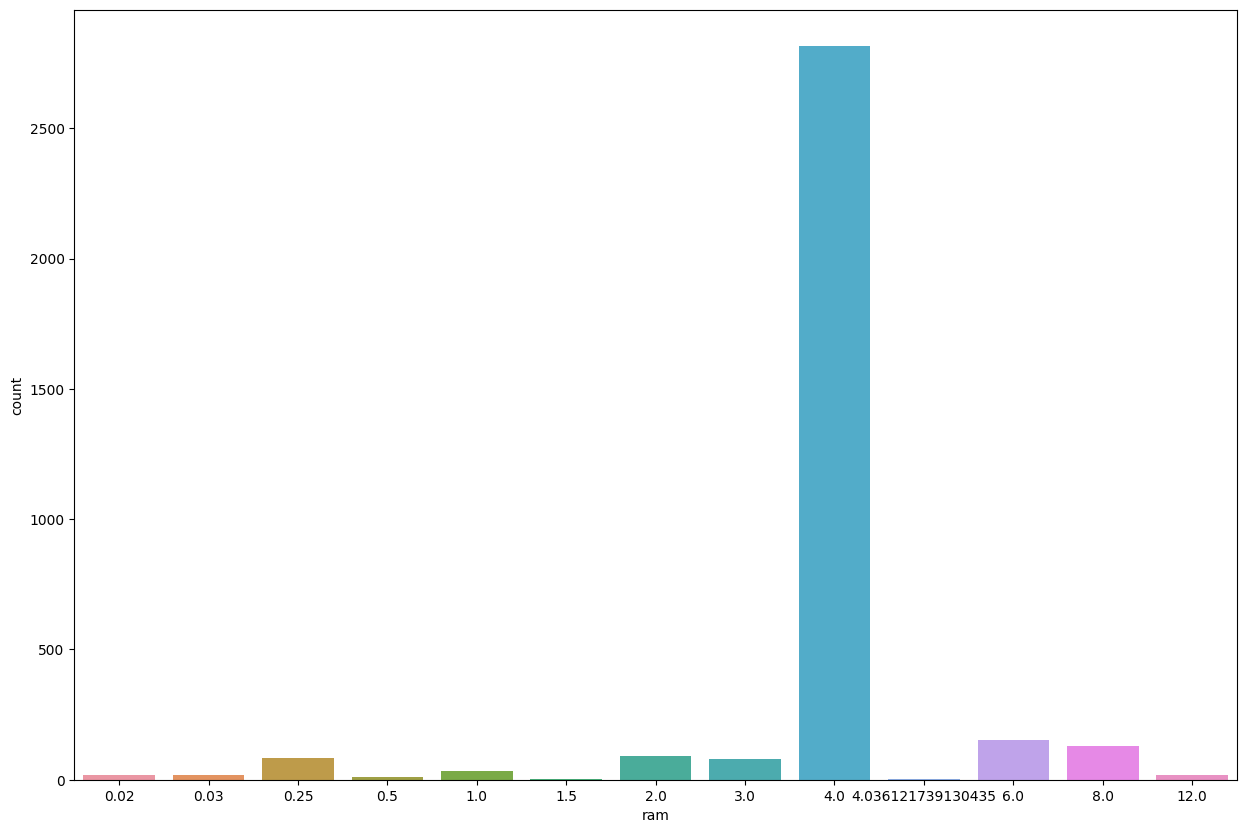

In [161]:
plt.figure(figsize = (15,10))
sns.countplot(x='ram',data=df)

# **Most phones have 4GB Ram**


In [162]:
df['release_year'].value_counts()

2014    642
2013    570
2015    515
2019    446
2016    383
2018    322
2017    299
2020    277
Name: release_year, dtype: int64

<Axes: xlabel='release_year', ylabel='count'>

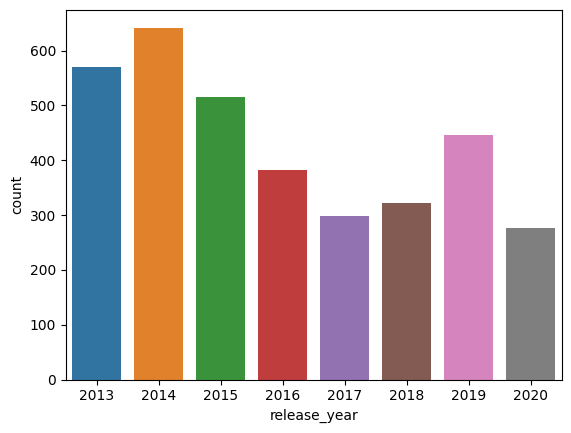

In [163]:
sns.countplot(x='release_year',data=df)

In [164]:
df['internal_memory'].value_counts()

16.000000      1283
32.000000      1083
64.000000       509
128.000000      372
256.000000       86
512.000000       44
0.060000         18
0.100000         17
8.000000         12
4.000000         10
1024.000000       8
0.500000          4
54.573099         4
0.200000          2
24.000000         1
0.010000          1
Name: internal_memory, dtype: int64

# **Checking distribution of data**

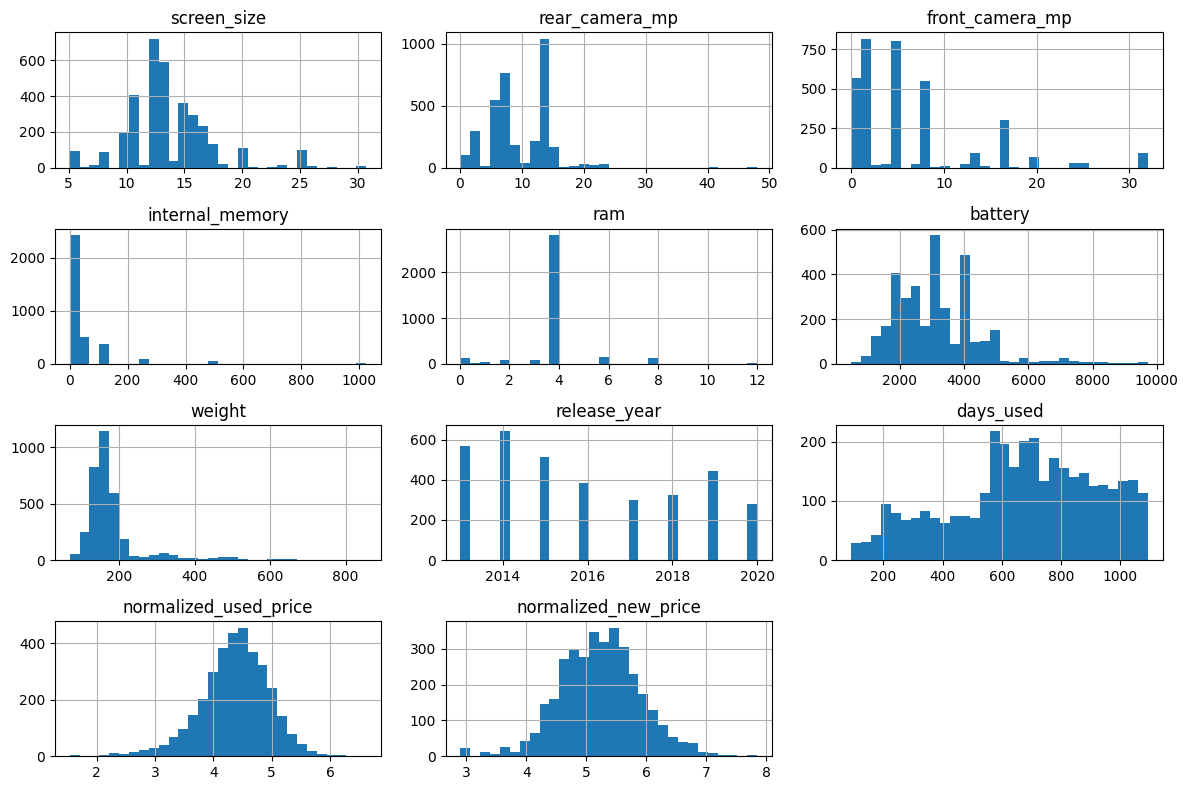

In [165]:
df.hist(figsize=(12,8),bins=30)
plt.tight_layout()

# **Checking Outliers**


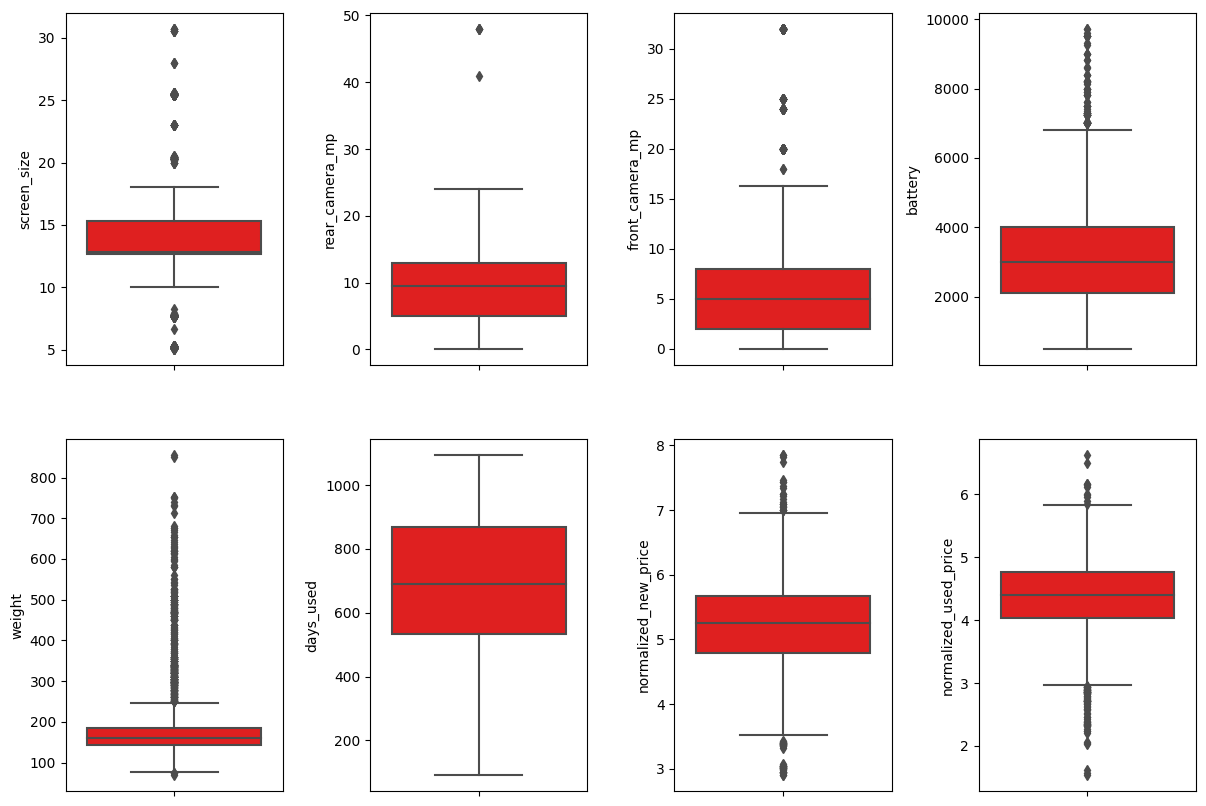

In [166]:
cols2 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price','normalized_used_price']
fig,ax=plt.subplots(2,4,figsize=(12,8))
index=0
ax=ax.flatten()
for i in cols2:
  sns.boxplot(y=i, data=df, color='r', ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

In [167]:
#Functions to detect ouliers
def detect_outliers(columns):
   outlier_indices = []
   for i in columns:
# 1st quartile
        Q1 = np.percentile(df[i], 25)
# 3st quartile
        Q3 = np.percentile(df[i], 75)
# IQR
        IQR = Q3 - Q1
# Outlier Step
        outlier_step = IQR * 1.5
# detect outlier and their indeces
        outlier_list_col = df[(df[i] < Q1 - outlier_step)
|       (df[i] > Q3 + outlier_step)].index
# store indices
        outlier_indices.extend(outlier_list_col)
        return outlier_indices


In [168]:
len(detect_outliers(cols2))

450

# **450 Outliers Found**

In [169]:
#Function to remove outliers by iqr method
def remove_outliers(df, cols2, k=1.5):
    for i in cols2:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

In [170]:
df = remove_outliers(df, cols2)

In [171]:
len(detect_outliers(cols2))

2

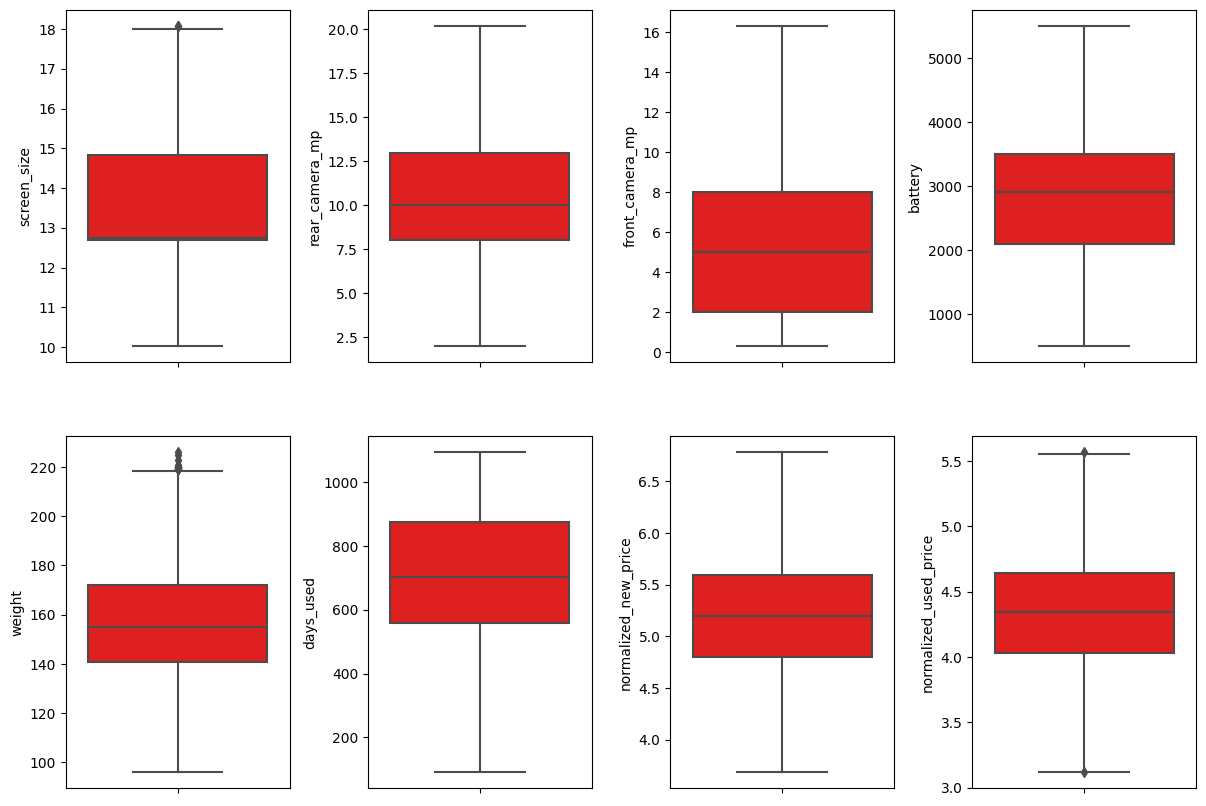

In [172]:
fig,ax=plt.subplots(2,4,figsize=(12,8))
index=0
ax=ax.flatten()
for i in cols2:
  sns.boxplot(y=i, data=df, color='r', ax=ax[index])
  index+=1
  plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)

In [173]:
df = df.drop(detect_outliers(cols2),axis = 0).reset_index(drop = True)

In [174]:
len(detect_outliers(cols2))

1

Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [175]:
from sklearn.preprocessing import LabelEncoder
label_encoder_4g = LabelEncoder()
label_encoder_5g = LabelEncoder()

df['4g'] = label_encoder_4g.fit_transform(df['4g'])
df['5g'] = label_encoder_5g.fit_transform(df['5g'])

In [176]:
df = df.drop(['os','device_brand'],axis=1)
df

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,1,0,13.000000,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,1,1,13.000000,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,1,1,13.000000,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,15.32,1,0,13.000000,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
4,16.23,1,0,13.000000,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2486,15.34,1,0,9.460208,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
2487,15.24,1,0,13.000000,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
2488,15.80,1,0,13.000000,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
2489,15.80,1,0,13.000000,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


Separating into features variables and target variable.

In [177]:
X = df.drop('normalized_used_price', axis = 1)
X = X.values
y = df['normalized_used_price']

# **Train Test Split**

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Standard Scaler**




In [181]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Linear Regression Model**

In [182]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
X_train_Prediction = linear_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_Prediction))
print("R2 Score : ",r2_score(y_train,X_train_Prediction))

MSE :  0.0432224100432141
R2 Score :  0.7898735753051315


In [183]:
cross_linear = cross_val_score(linear_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_linear = np.mean(cross_linear)
print(mean_cross_linear)

-0.04416184387407957


# **Ridge Regression Model**

In [184]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
X_train_pred_ridge = ridge_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_ridge))
print("R2 Score : ",r2_score(y_train,X_train_pred_ridge))

MSE :  0.04322243244266784
R2 Score :  0.7898734664098357


In [185]:
cross_ridge = cross_val_score(ridge_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_ridge = np.mean(cross_ridge)
print(mean_cross_ridge)


-0.0441601837117672


# **Lasso Regression Model**


In [186]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)
X_train_pred_lasso = lasso_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_lasso))
print("R2 Score : ",r2_score(y_train,X_train_pred_lasso))

MSE :  0.20569716591322953
R2 Score :  0.0


In [187]:
cross_lasso = cross_val_score(lasso_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_lasso = np.mean(cross_lasso)
print(mean_cross_lasso)

-0.2057535586855262


# **SVM Regression Model**

In [188]:
svmreg_model = SVR()
svmreg_model.fit(X_train,y_train)
X_train_pred_svmreg = svmreg_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_svmreg))
print("R2 Score : ",r2_score(y_train,X_train_pred_svmreg))

MSE :  0.034505121150867915
R2 Score :  0.8322528120517547


In [189]:
cross_svmreg = cross_val_score(svmreg_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_svmreg = np.mean(cross_svmreg)
print(mean_cross_svmreg)

-0.048010282913381504


# **Decision Tree Regression Model**

In [190]:
dtree_model = DecisionTreeRegressor(max_depth=10)
dtree_model.fit(X_train,y_train)
X_train_pred_dtree = dtree_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_dtree))
print("R2 Score : ",r2_score(y_train,X_train_pred_dtree))

MSE :  0.01585736173925673
R2 Score :  0.922909187062179


In [191]:
cross_dtree = cross_val_score(dtree_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_dtree = np.mean(cross_dtree)
print(mean_cross_dtree)

-0.07692012125685432


# **Random Forest Regression Model**

In [192]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
X_train_pred_rfr = rfr_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_rfr))
print("R2 Score : ",r2_score(y_train,X_train_pred_rfr))

MSE :  0.0067899823129906325
R2 Score :  0.9669903944332665


In [193]:
cross_rfr = cross_val_score(rfr_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_rfr = np.mean(cross_rfr)
print(mean_cross_rfr)

-0.04951804688120297


In [195]:
X_test_pred_rfr = rfr_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,X_test_pred_rfr))
print("R2 Score : ",r2_score(y_test,X_test_pred_rfr))

MSE :  0.0442701254303282
R2 Score :  0.7733998359773835


Looking at our Machine Learning models we can see that we have some models that performed their function well and others not so much, the best model we had was the Random Forest model with the best score,  when we look at our RMSE we see that the Random Forest model had the best score, so it depends on the management objective to choose the best model, in my view the model of Random Forest is the one that best satisfies looking at all metrics.